### Heatmap Plots

set 14090
14090 14090 14090
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
mla -1.0 2981
mla -0.75 2371
mla -0.5 2033
mla -0.25 1653
mla 0.0 1367
mla 0.25 878
mla 0.5 679
mla 0.75 459
mla 1.0 250
mla 1.25 177
mla 1.5 150
mla 1.75 137
mla 2.0 139
mla 2.25 162
mla 2.5 195
mla 2.75 130
mla 3.0 102
mla 3.25 113
mla 3.5 36
mla 3.75 20
mla 4.0 7
mla 4.25 9
mla 4.5 20
mla 4.75 11
mla 5.0 6
mla 5.25 2
mla 5.5 0
mla 5.75 2
mla 6.0 1
mla 6.25 0
mla 6.5 0
mla 6.75 0
mla 7.0 0
freq 0.0 2614
freq 0.01 5884
freq 0.02 2438
freq 0.03 796
freq 

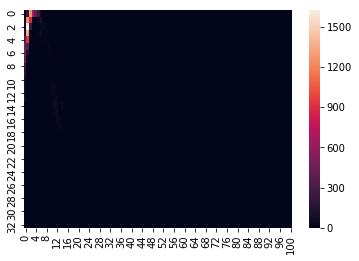

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def get_same_genes_list(A,B):
    k1 = A.keys()
    k2 = B.keys()
    s = set.intersection(set(k1), set(k2))
    print ('set', len(s))

    list_A = []
    list_B = []
    genes = []
    for g in sorted(s):
        list_A.append(A[g])
        list_B.append(B[g])
        genes.append(g)

    return (list_A, list_B, genes)

def get_same_genes_dict(A,B):
    k1 = A.keys()
    k2 = B.keys()
    s = set.intersection(set(k1), set(k2))
    print ('set', len(s))

    d = {}
    for g in sorted(s):
        d[g] = {'MLA':A[g], 'mut_freq':B[g]}

    return d

def prep_matrix(mla, mut_freq,stepx=0.25, stepy=0.05):
    
    x,y,genes = get_same_genes_list(mla, mut_freq)
    
    print (len(x), len(y),len(genes))  

    
    minx = math.floor(min(x))
    maxx = math.ceil(max(x))
    miny = math.floor(min(y))
    maxy = math.ceil(max(y))
    
    rx = np.arange(minx,maxx+stepx,stepx)
    ry = np.arange(miny,maxy+stepy,stepy)

    print (ry)
    mla_bins_dict = {b:set() for b in rx}
    freq_bins_dict = {b:set() for b in ry}

    
    for i in range(len(x)):
        u = x[i]
        v = y[i]
        g = genes[i]
        
        for j in rx:
            if u>j and u<=j+stepx:
                mla_bins_dict[j].update([g])
        
        for k in ry:
            if v>k and v<=k+stepy:
                freq_bins_dict[k].update([g])
                
    
    for k,v in sorted(mla_bins_dict.items()):
        print ('mla',k, len(v))
        
    for k,v in sorted(freq_bins_dict.items()):
        print ('freq',k, len(v))       
    
    matrix = np.zeros((len(rx),len(ry)))
    

    for idx in range(len(genes)):
        mla_val = x[idx]
        freq_val = y[idx]
        g = genes[idx]
        
        for i in range(len(rx)):
            for j in range(len(ry)):
                if (mla_val>rx[i] and mla_val<=rx[i]+stepx) and (freq_val>ry[j] and freq_val<=ry[j]+stepy):
                    matrix[i][j] +=1
    
    print (matrix)
    sns.heatmap(matrix)
                
                
            
#     l1 = []
#     for i in range(len(mla_bins_dict.keys())):
#         l2 = []
#         for j in range(len(freq_bins_dict.keys())):
#             l2.append(freq_bins_dict[freq_bins_dict.keys()[j]])
#         l1.append(l2)
    
#     print (l1)
            
        
def plot_heatmap(mla,mut_freq,step=0.25):
    x,y,genes = get_same_genes_list(mla, mut_freq)
    d = get_same_genes_dict(mla, mut_freq)

#     df = pd.DataFrame(list(zip(genes,x,y)),columns=['Genes', 'MLA','freq'])
#     df.set_index('Genes', inplace=True)
#     print (df.head())

#     mesh = np.meshgrid(x,y)
#     print (mesh)
    
    d_temp = np.column_stack((x,y)) #np.array(d.values())

    
    sns.heatmap(d_temp)
    

    
cancer_subtypes = ['BLCA', 'BRCA', 'CRC', 'GBM', 'HNSC', 'KIRC', 'LAML', 'LUAD', 'LUSC', 'OV', 'UCEC', 'pancancer']

for c in cancer_subtypes:
    if c == 'BRCA':
        mut_freq_file = '../data/mutation_freq_intact_filtered/' + c + '_freq.txt'
        MLA_file = '../data/mla_intact_filtered/' + c + '_MLA_standardized.txt'

        with open(mut_freq_file, 'r') as f:
            mut_freq = {line.split()[0]:float(line.split()[1]) for line in f.readlines()}
        with open(MLA_file, 'r') as f:
            mla = {line.split()[0]:float(line.split()[1]) for line in f.readlines()}
        
#         print (mut_freq)
#         print ('MLA', mla)
        
#         plot_heatmap(mla, mut_freq)
        prep_matrix(mla, mut_freq,stepx=0.25,stepy=0.01)

[[0.27531188 0.50155029 0.81693033 0.86356861 0.86074069 0.87666766
  0.50233494 0.66999989 0.16905881 0.30972115 0.99490848 0.80823375
  0.54592011 0.92921698 0.73498589 0.32091964 0.2334065  0.00457445
  0.69071125 0.02558057]
 [0.42111866 0.25558421 0.70239413 0.37162589 0.61812632 0.18083709
  0.70440807 0.73757044 0.56241194 0.5077354  0.57636033 0.80795544
  0.87830078 0.164042   0.8776293  0.21377392 0.42616425 0.93170897
  0.65638947 0.43220239]
 [0.82844186 0.67755364 0.39645662 0.45686329 0.32179118 0.03535569
  0.16471383 0.37930619 0.94403978 0.4427237  0.85042856 0.97534356
  0.64541384 0.79341579 0.47611548 0.42854658 0.23191023 0.16576757
  0.90785156 0.17745397]
 [0.73485567 0.86902663 0.30030824 0.78191331 0.59909526 0.19191213
  0.32180477 0.49182506 0.08062463 0.7918232  0.42920461 0.27786443
  0.76380791 0.10817736 0.69622611 0.78627088 0.6329471  0.7134899
  0.84925342 0.22990785]
 [0.41677952 0.35304445 0.04510514 0.48504962 0.66692175 0.31359733
  0.4693     0.96

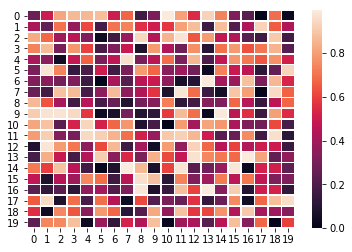

In [8]:
uniform_data = np.random.rand(20, 20)
print (uniform_data)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]] [[0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5]]


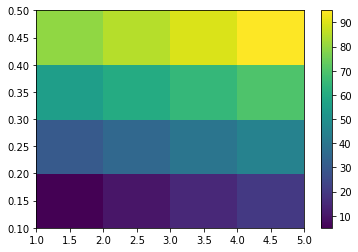

In [92]:
x = [1, 2, 3, 4, 5]
y = [0.1, 0.2, 0.3, 0.4, 0.5]

intensity = [
    [5, 10, 15, 20, 25],
    [30, 35, 40, 45, 50],
    [55, 60, 65, 70, 75],
    [80, 85, 90, 95, 100],
    [105, 110, 115, 120, 125]
]

#setup the 2D grid with Numpy
x, y = np.meshgrid(x, y)
print (x,y)


#convert intensity (list of lists) to a numpy array for plotting
intensity = np.array(intensity)

#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show()

[[0.98616495 0.39588423 0.85914916 0.84138973 0.73670987 0.42826772
  0.81503866 0.38372286 0.07884151 0.67045996 0.72019819 0.14457475
  0.71105955 0.77003221 0.20769076 0.43738678]
 [0.41907595 0.41081735 0.58180295 0.22435584 0.56072217 0.11211707
  0.35719651 0.11094619 0.55965779 0.34989684 0.86712975 0.99461383
  0.28535905 0.56784827 0.25933155 0.76905588]
 [0.44768208 0.53549798 0.91752991 0.56535498 0.79237652 0.11136056
  0.21408465 0.51928971 0.02590938 0.38809751 0.71411782 0.16920134
  0.09948034 0.90101093 0.77904426 0.1973985 ]
 [0.76417207 0.70181726 0.79932439 0.74583393 0.02916434 0.33627978
  0.93380226 0.00259946 0.40121854 0.10341944 0.13789078 0.67417662
  0.51878924 0.17921486 0.56741298 0.91315653]
 [0.04123526 0.29304887 0.09571363 0.05718039 0.83229688 0.23903304
  0.20325796 0.35562287 0.67340685 0.4253732  0.77590662 0.87986501
  0.49658426 0.00178219 0.71124818 0.51592257]
 [0.71733034 0.9759777  0.81165686 0.1709687  0.02617273 0.35313725
  0.06708012 0.19

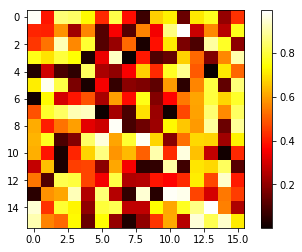

In [2]:
a = np.random.random((16, 16))
print (a)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()